Connect to Gdriv

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Setup libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly as py
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


make a dataframe

In [3]:
df = pd.read_csv("drive/MyDrive/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


  show the plots

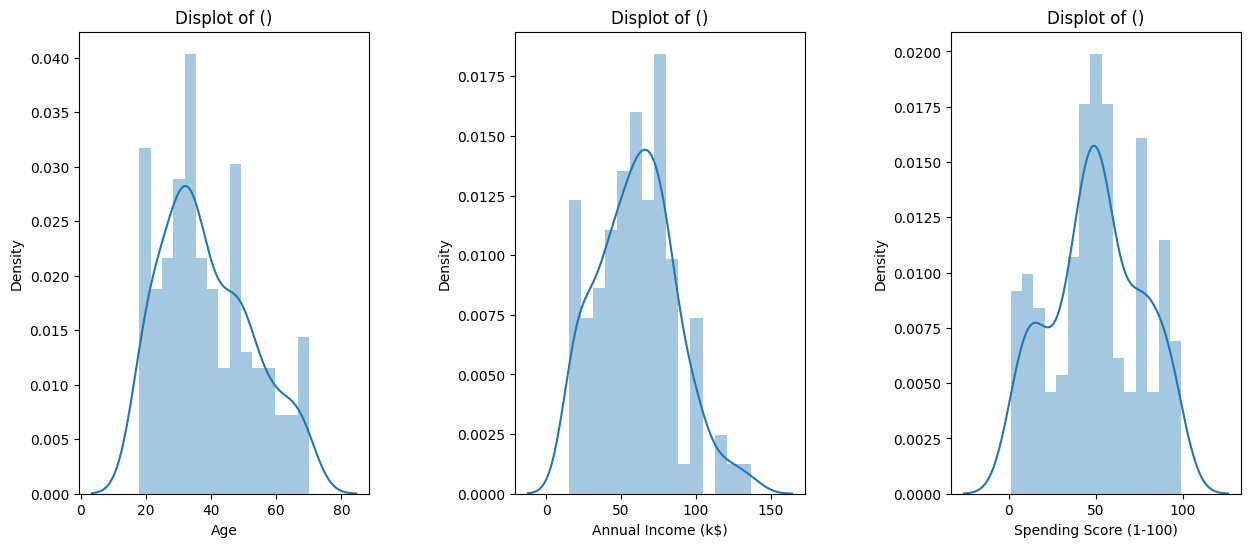

In [5]:
df.describe()
plt.figure(1, figsize = (15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n += 1
  plt.subplot(1, 3, n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins = 15)
  plt.title('Displot of ()'.format(x))
plt.show()

Label encoding and show the dendrogram plot

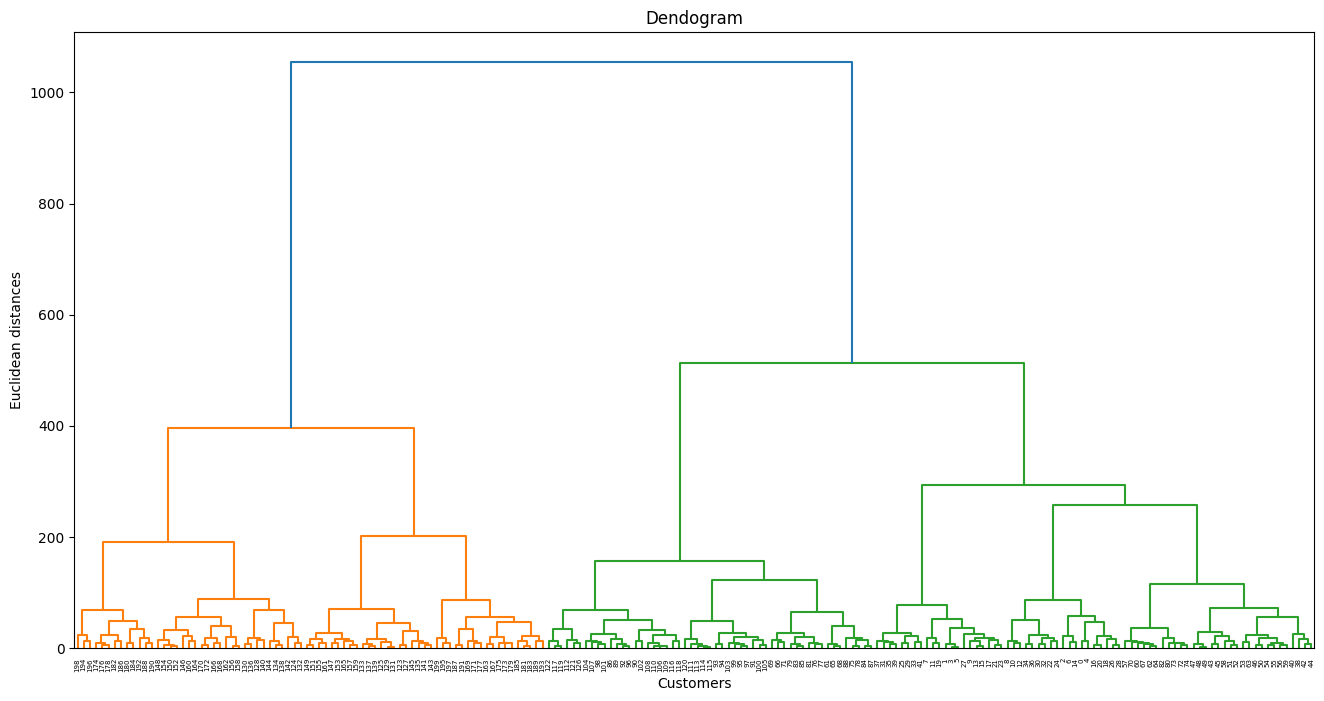

In [9]:
label_encoder = preprocessing.LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

# Dendogram plot
plt.figure(1, figsize=(16, 8))
dendrogram = sch.dendrogram(sch.linkage(df, method = "ward"))

plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


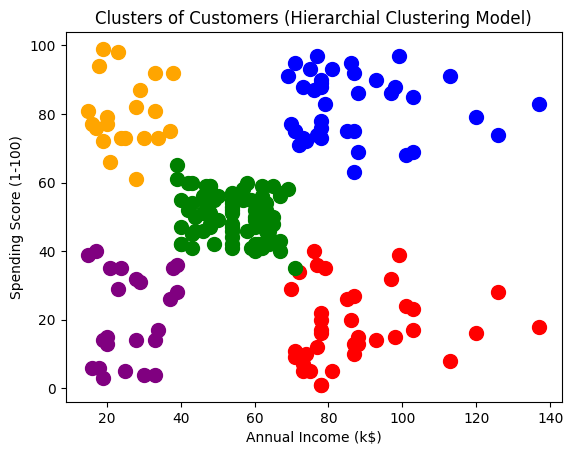

In [10]:
hc = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean', linkage='average')
y_hc = hc.fit_predict(df)
print(y_hc)

X = df.iloc[:, [3, 4]].values

plt.scatter(X[y_hc==0, 0], X[y_hc==0, 1], s=100, c='red', label = 'Cluster1')
plt.scatter(X[y_hc==1, 0], X[y_hc==1, 1], s=100, c='blue', label = 'Cluster2')
plt.scatter(X[y_hc==2, 0], X[y_hc==2, 1], s=100, c='green', label = 'Cluster3')
plt.scatter(X[y_hc==3, 0], X[y_hc==3, 1], s=100, c='purple', label = 'Cluster4')
plt.scatter(X[y_hc==4, 0], X[y_hc==4, 1], s=100, c='orange', label = 'Cluster1')
plt.title('Clusters of Customers (Hierarchial Clustering Model)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

plt.show()